<a href="https://colab.research.google.com/github/warisaaom/KKU_Data_Mining/blob/master/Copy_of_FIFA_WORLD_CUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# เรื่อง การทำ Classification เเต่ละวิธี เพื่อหาผลทำนายการเเพ้ชนะของการเเข่งขัน


##Link for download dataset
- https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017?fbclid=IwAR28Slf_F03Zm4t_Rf-YfWO2Tm8bKbHSVpI_n_D09hBycYvqN08nKV0lwOE
- https://www.kaggle.com/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now?fbclid=IwAR1jUXhQ6o4sqgD8P4xAJostWef0VJQIVIrNqkEj9TK92HfWNPFooEX6p2Q

In [ ]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
rankings = pd.read_csv('/content/drive/My Drive/DWDM_material/fifa_ranking.csv')

In [ ]:
rankings

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,8/8/1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,7/6/2018
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,7/6/2018
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,7/6/2018
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,7/6/2018


In [ ]:
rankings = rankings.loc[:,['rank', 'country_full', 'country_abrv', 'cur_year_avg_weighted', 'rank_date', 
                           'two_year_ago_weighted', 'three_year_ago_weighted']] #เพื่อกำหนดให้ชุดข้อมูลของ ranking มีเเค่ column ตามที่กำหนด

In [ ]:
rankings 

,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted
0,1,Germany,GER,0.0,8/8/1993,0.0,0.0
1,2,Italy,ITA,0.0,8/8/1993,0.0,0.0
2,3,Switzerland,SUI,0.0,8/8/1993,0.0,0.0
3,4,Sweden,SWE,0.0,8/8/1993,0.0,0.0
4,5,Argentina,ARG,0.0,8/8/1993,0.0,0.0
...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,7/6/2018,0.0,0.0
57789,206,Bahamas,BAH,0.0,7/6/2018,0.0,0.0
57790,206,Eritrea,ERI,0.0,7/6/2018,0.0,0.0
57791,206,Somalia,SOM,0.0,7/6/2018,0.0,0.0


In [ ]:
rankings = rankings.replace({"IR Iran": "Iran"}) #เพื่อเปลี่ยนชื่อจาก IR Iran เป็น Iran

In [ ]:
rankings['weighted_points'] =  rankings['cur_year_avg_weighted'] + rankings['two_year_ago_weighted'] + rankings['three_year_ago_weighted'] #สร้าง column weighted_points โดย การใช้ค่าใน 3 column ที่กำหนดมา + กัน

In [ ]:
rankings.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   cur_year_avg_weighted    57793 non-null  float64
 4   rank_date                57793 non-null  object 
 5   two_year_ago_weighted    57793 non-null  float64
 6   three_year_ago_weighted  57793 non-null  float64
 7   weighted_points          57793 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.5+ MB


In [ ]:
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])

In [ ]:
rankings.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64         
 1   country_full             57793 non-null  object        
 2   country_abrv             57793 non-null  object        
 3   cur_year_avg_weighted    57793 non-null  float64       
 4   rank_date                57793 non-null  datetime64[ns]
 5   two_year_ago_weighted    57793 non-null  float64       
 6   three_year_ago_weighted  57793 non-null  float64       
 7   weighted_points          57793 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 3.5+ MB


## *matches Table*

In [ ]:
matches = pd.read_csv('/content/drive/My Drive/DWDM_material/results.csv')

In [ ]:
matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41635,8/9/2020,Luxembourg,Montenegro,0,1,UEFA Nations League,Luxembourg City,Luxembourg,False
41636,8/9/2020,Cyprus,Azerbaijan,0,1,UEFA Nations League,Nicosia,Cyprus,False
41637,8/9/2020,Armenia,Estonia,2,0,UEFA Nations League,Yerevan,Armenia,False
41638,8/9/2020,Georgia,North Macedonia,1,1,UEFA Nations League,Tbilisi,Georgia,False


In [ ]:
matches =  matches.replace({'Germany DR': 'Germany', 'China': 'China PR'})#เปลี่ยนชื่อจาก Germany DR เเละ China ให้เป็น Germany กับ China PR ตามลำดับ

In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41640 entries, 0 to 41639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41640 non-null  object
 1   home_team   41640 non-null  object
 2   away_team   41640 non-null  object
 3   home_score  41640 non-null  int64 
 4   away_score  41640 non-null  int64 
 5   tournament  41640 non-null  object
 6   city        41640 non-null  object
 7   country     41640 non-null  object
 8   neutral     41640 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [ ]:
matches['date'] = pd.to_datetime(matches['date'])  

In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41640 entries, 0 to 41639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        41640 non-null  datetime64[ns]
 1   home_team   41640 non-null  object        
 2   away_team   41640 non-null  object        
 3   home_score  41640 non-null  int64         
 4   away_score  41640 non-null  int64         
 5   tournament  41640 non-null  object        
 6   city        41640 non-null  object        
 7   country     41640 non-null  object        
 8   neutral     41640 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.6+ MB


In [ ]:
# want to have the ranks for every day 
rankings = rankings.set_index(['rank_date'])\
            .groupby(['country_full'], group_keys=False)\
            .resample('D').first()\
            .fillna(method='ffill')\
            .reset_index()

In [ ]:
matches 

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41635,2020-08-09,Luxembourg,Montenegro,0,1,UEFA Nations League,Luxembourg City,Luxembourg,False
41636,2020-08-09,Cyprus,Azerbaijan,0,1,UEFA Nations League,Nicosia,Cyprus,False
41637,2020-08-09,Armenia,Estonia,2,0,UEFA Nations League,Yerevan,Armenia,False
41638,2020-08-09,Georgia,North Macedonia,1,1,UEFA Nations League,Tbilisi,Georgia,False


In [ ]:
# join the ranks เป็นการนำชุดข้อมูลตาราง matches เเละ ranking เป็นรวมกัน โดยใช้คำสั่ง merge 
matches = matches.merge(rankings, 
                        left_on=['date', 'home_team'], 
                        right_on=['rank_date', 'country_full'])
matches = matches.merge(rankings, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'], 
                        suffixes=('_home', '_away'))

In [ ]:
matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,rank_home,country_full_home,country_abrv_home,cur_year_avg_weighted_home,two_year_ago_weighted_home,three_year_ago_weighted_home,weighted_points_home,rank_date_away,rank_away,country_full_away,country_abrv_away,cur_year_avg_weighted_away,two_year_ago_weighted_away,three_year_ago_weighted_away,weighted_points_away
0,1993-09-01,Sierra Leone,Togo,0,0,African Cup of Nations qualification,Conakry,Guinea,True,1993-09-01,86.0,Sierra Leone,SLE,0.00,0.00,0.00,0.00,1993-09-01,114.0,Togo,TOG,0.00,0.00,0.00,0.00
1,1993-10-01,Angola,Zimbabwe,1,1,FIFA World Cup qualification,Luanda,Angola,False,1993-10-01,97.0,Angola,ANG,0.00,0.00,0.00,0.00,1993-10-01,47.0,Zimbabwe,ZIM,0.00,0.00,0.00,0.00
2,1993-10-01,Botswana,South Africa,0,2,Friendly,Gaborone,Botswana,False,1993-10-01,136.0,Botswana,BOT,0.00,0.00,0.00,0.00,1993-10-01,95.0,South Africa,RSA,0.00,0.00,0.00,0.00
3,1993-10-01,Senegal,Algeria,1,2,African Cup of Nations qualification,Dakar,Senegal,False,1993-10-01,57.0,Senegal,SEN,0.00,0.00,0.00,0.00,1993-10-01,30.0,Algeria,ALG,0.00,0.00,0.00,0.00
4,1993-10-01,Tunisia,Bulgaria,3,0,Friendly,Béja,Tunisia,False,1993-10-01,34.0,Tunisia,TUN,0.00,0.00,0.00,0.00,1993-10-01,37.0,Bulgaria,BUL,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18229,2018-01-12,Malaysia,Thailand,0,0,AFF Championship,Kuala Lumpur,Malaysia,False,2018-01-12,174.0,Malaysia,MAS,22.42,23.18,13.98,59.58,2018-01-12,130.0,Thailand,THA,100.06,60.31,20.27,180.64
18230,2018-02-12,Philippines,Vietnam,1,2,AFF Championship,Bacolod,Philippines,False,2018-02-12,123.0,Philippines,PHI,126.44,44.86,21.57,192.87,2018-02-12,112.0,Vietnam,VIE,180.98,36.34,24.53,241.85
18231,2018-05-12,Thailand,Malaysia,2,2,AFF Championship,Bangkok,Thailand,False,2018-05-12,129.0,Thailand,THA,100.06,60.31,22.12,182.49,2018-05-12,178.0,Malaysia,MAS,22.42,23.18,10.21,55.81
18232,2018-06-12,Vietnam,Philippines,2,1,AFF Championship,Hanoi,Vietnam,False,2018-06-12,102.0,Vietnam,VIE,222.70,44.09,18.15,284.94,2018-06-12,111.0,Philippines,PHI,151.51,62.40,22.76,236.67


In [ ]:
# สร้าง column เพื่อ นำมาใช้ในกระบวนการ classification ตามลำดับ
matches['rank_difference'] = abs(matches['rank_home'] - matches['rank_away'])
matches['average_rank'] = (matches['rank_home'] + matches['rank_away'])/2
matches['point_difference'] = abs(matches['weighted_points_home'] - matches['weighted_points_away'])
matches['score_difference'] = abs(matches['home_score'] - matches['away_score'])
matches['is_won'] = matches['score_difference'] >0
matches['is_stake'] = matches['tournament'] != 'Friendly'

In [ ]:
matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,rank_home,country_full_home,country_abrv_home,cur_year_avg_weighted_home,two_year_ago_weighted_home,three_year_ago_weighted_home,weighted_points_home,rank_date_away,rank_away,country_full_away,country_abrv_away,cur_year_avg_weighted_away,two_year_ago_weighted_away,three_year_ago_weighted_away,weighted_points_away,rank_difference,average_rank,point_difference,score_difference,is_won,is_stake
0,1993-09-01,Sierra Leone,Togo,0,0,African Cup of Nations qualification,Conakry,Guinea,True,1993-09-01,86.0,Sierra Leone,SLE,0.00,0.00,0.00,0.00,1993-09-01,114.0,Togo,TOG,0.00,0.00,0.00,0.00,-28.0,100.0,0.00,0,False,True
1,1993-10-01,Angola,Zimbabwe,1,1,FIFA World Cup qualification,Luanda,Angola,False,1993-10-01,97.0,Angola,ANG,0.00,0.00,0.00,0.00,1993-10-01,47.0,Zimbabwe,ZIM,0.00,0.00,0.00,0.00,50.0,72.0,0.00,0,False,True
2,1993-10-01,Botswana,South Africa,0,2,Friendly,Gaborone,Botswana,False,1993-10-01,136.0,Botswana,BOT,0.00,0.00,0.00,0.00,1993-10-01,95.0,South Africa,RSA,0.00,0.00,0.00,0.00,41.0,115.5,0.00,2,True,False
3,1993-10-01,Senegal,Algeria,1,2,African Cup of Nations qualification,Dakar,Senegal,False,1993-10-01,57.0,Senegal,SEN,0.00,0.00,0.00,0.00,1993-10-01,30.0,Algeria,ALG,0.00,0.00,0.00,0.00,27.0,43.5,0.00,1,True,True
4,1993-10-01,Tunisia,Bulgaria,3,0,Friendly,Béja,Tunisia,False,1993-10-01,34.0,Tunisia,TUN,0.00,0.00,0.00,0.00,1993-10-01,37.0,Bulgaria,BUL,0.00,0.00,0.00,0.00,-3.0,35.5,0.00,3,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18229,2018-01-12,Malaysia,Thailand,0,0,AFF Championship,Kuala Lumpur,Malaysia,False,2018-01-12,174.0,Malaysia,MAS,22.42,23.18,13.98,59.58,2018-01-12,130.0,Thailand,THA,100.06,60.31,20.27,180.64,44.0,152.0,-121.06,0,False,True
18230,2018-02-12,Philippines,Vietnam,1,2,AFF Championship,Bacolod,Philippines,False,2018-02-12,123.0,Philippines,PHI,126.44,44.86,21.57,192.87,2018-02-12,112.0,Vietnam,VIE,180.98,36.34,24.53,241.85,11.0,117.5,-48.98,1,True,True
18231,2018-05-12,Thailand,Malaysia,2,2,AFF Championship,Bangkok,Thailand,False,2018-05-12,129.0,Thailand,THA,100.06,60.31,22.12,182.49,2018-05-12,178.0,Malaysia,MAS,22.42,23.18,10.21,55.81,-49.0,153.5,126.68,0,False,True
18232,2018-06-12,Vietnam,Philippines,2,1,AFF Championship,Hanoi,Vietnam,False,2018-06-12,102.0,Vietnam,VIE,222.70,44.09,18.15,284.94,2018-06-12,111.0,Philippines,PHI,151.51,62.40,22.76,236.67,-9.0,106.5,48.27,1,True,True


In [ ]:
matches['is_won'] = matches['is_won'].map({False: 0,True: 1}) # เปลี่ยนให้ ค่าข้อมูลใน is_won จาก False,True ให้เป็น 0,1 ตามลำดับ
matches['is_won']

0        0
1        0
2        1
3        1
4        1
        ..
18229    0
18230    1
18231    0
18232    1
18233    0
Name: is_won, Length: 18234, dtype: int64

In [ ]:
matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,rank_home,country_full_home,country_abrv_home,cur_year_avg_weighted_home,two_year_ago_weighted_home,three_year_ago_weighted_home,weighted_points_home,rank_date_away,rank_away,country_full_away,country_abrv_away,cur_year_avg_weighted_away,two_year_ago_weighted_away,three_year_ago_weighted_away,weighted_points_away,rank_difference,average_rank,point_difference,score_difference,is_won,is_stake
0,1993-09-01,Sierra Leone,Togo,0,0,African Cup of Nations qualification,Conakry,Guinea,True,1993-09-01,86.0,Sierra Leone,SLE,0.00,0.00,0.00,0.00,1993-09-01,114.0,Togo,TOG,0.00,0.00,0.00,0.00,-28.0,100.0,0.00,0,0,True
1,1993-10-01,Angola,Zimbabwe,1,1,FIFA World Cup qualification,Luanda,Angola,False,1993-10-01,97.0,Angola,ANG,0.00,0.00,0.00,0.00,1993-10-01,47.0,Zimbabwe,ZIM,0.00,0.00,0.00,0.00,50.0,72.0,0.00,0,0,True
2,1993-10-01,Botswana,South Africa,0,2,Friendly,Gaborone,Botswana,False,1993-10-01,136.0,Botswana,BOT,0.00,0.00,0.00,0.00,1993-10-01,95.0,South Africa,RSA,0.00,0.00,0.00,0.00,41.0,115.5,0.00,2,1,False
3,1993-10-01,Senegal,Algeria,1,2,African Cup of Nations qualification,Dakar,Senegal,False,1993-10-01,57.0,Senegal,SEN,0.00,0.00,0.00,0.00,1993-10-01,30.0,Algeria,ALG,0.00,0.00,0.00,0.00,27.0,43.5,0.00,1,1,True
4,1993-10-01,Tunisia,Bulgaria,3,0,Friendly,Béja,Tunisia,False,1993-10-01,34.0,Tunisia,TUN,0.00,0.00,0.00,0.00,1993-10-01,37.0,Bulgaria,BUL,0.00,0.00,0.00,0.00,-3.0,35.5,0.00,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18229,2018-01-12,Malaysia,Thailand,0,0,AFF Championship,Kuala Lumpur,Malaysia,False,2018-01-12,174.0,Malaysia,MAS,22.42,23.18,13.98,59.58,2018-01-12,130.0,Thailand,THA,100.06,60.31,20.27,180.64,44.0,152.0,-121.06,0,0,True
18230,2018-02-12,Philippines,Vietnam,1,2,AFF Championship,Bacolod,Philippines,False,2018-02-12,123.0,Philippines,PHI,126.44,44.86,21.57,192.87,2018-02-12,112.0,Vietnam,VIE,180.98,36.34,24.53,241.85,11.0,117.5,-48.98,1,1,True
18231,2018-05-12,Thailand,Malaysia,2,2,AFF Championship,Bangkok,Thailand,False,2018-05-12,129.0,Thailand,THA,100.06,60.31,22.12,182.49,2018-05-12,178.0,Malaysia,MAS,22.42,23.18,10.21,55.81,-49.0,153.5,126.68,0,0,True
18232,2018-06-12,Vietnam,Philippines,2,1,AFF Championship,Hanoi,Vietnam,False,2018-06-12,102.0,Vietnam,VIE,222.70,44.09,18.15,284.94,2018-06-12,111.0,Philippines,PHI,151.51,62.40,22.76,236.67,-9.0,106.5,48.27,1,1,True


In [ ]:
matches['is_stake'] = matches['is_stake'].map({False: 1,True: 0}) # เปลี่ยนให้ ค่าข้อมูลใน is_stake จาก False,True ให้เป็น 1,0 ตามลำดับ 1 แทนความหมายว่า เตะในบ้าน 0 แทนความหมายว่า เตะนอกบ้าน
matches['is_stake']

0        0
1        0
2        1
3        0
4        1
        ..
18229    0
18230    0
18231    0
18232    0
18233    0
Name: is_stake, Length: 18234, dtype: int64

In [ ]:
matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,rank_home,country_full_home,country_abrv_home,cur_year_avg_weighted_home,two_year_ago_weighted_home,three_year_ago_weighted_home,weighted_points_home,rank_date_away,rank_away,country_full_away,country_abrv_away,cur_year_avg_weighted_away,two_year_ago_weighted_away,three_year_ago_weighted_away,weighted_points_away,rank_difference,average_rank,point_difference,score_difference,is_won,is_stake
0,1993-09-01,Sierra Leone,Togo,0,0,African Cup of Nations qualification,Conakry,Guinea,0,1993-09-01,86.0,Sierra Leone,SLE,0.00,0.00,0.00,0.00,1993-09-01,114.0,Togo,TOG,0.00,0.00,0.00,0.00,-28.0,100.0,0.00,0,0,0
1,1993-10-01,Angola,Zimbabwe,1,1,FIFA World Cup qualification,Luanda,Angola,1,1993-10-01,97.0,Angola,ANG,0.00,0.00,0.00,0.00,1993-10-01,47.0,Zimbabwe,ZIM,0.00,0.00,0.00,0.00,50.0,72.0,0.00,0,0,0
2,1993-10-01,Botswana,South Africa,0,2,Friendly,Gaborone,Botswana,1,1993-10-01,136.0,Botswana,BOT,0.00,0.00,0.00,0.00,1993-10-01,95.0,South Africa,RSA,0.00,0.00,0.00,0.00,41.0,115.5,0.00,2,1,1
3,1993-10-01,Senegal,Algeria,1,2,African Cup of Nations qualification,Dakar,Senegal,1,1993-10-01,57.0,Senegal,SEN,0.00,0.00,0.00,0.00,1993-10-01,30.0,Algeria,ALG,0.00,0.00,0.00,0.00,27.0,43.5,0.00,1,1,0
4,1993-10-01,Tunisia,Bulgaria,3,0,Friendly,Béja,Tunisia,1,1993-10-01,34.0,Tunisia,TUN,0.00,0.00,0.00,0.00,1993-10-01,37.0,Bulgaria,BUL,0.00,0.00,0.00,0.00,-3.0,35.5,0.00,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18229,2018-01-12,Malaysia,Thailand,0,0,AFF Championship,Kuala Lumpur,Malaysia,1,2018-01-12,174.0,Malaysia,MAS,22.42,23.18,13.98,59.58,2018-01-12,130.0,Thailand,THA,100.06,60.31,20.27,180.64,44.0,152.0,-121.06,0,0,0
18230,2018-02-12,Philippines,Vietnam,1,2,AFF Championship,Bacolod,Philippines,1,2018-02-12,123.0,Philippines,PHI,126.44,44.86,21.57,192.87,2018-02-12,112.0,Vietnam,VIE,180.98,36.34,24.53,241.85,11.0,117.5,-48.98,1,1,0
18231,2018-05-12,Thailand,Malaysia,2,2,AFF Championship,Bangkok,Thailand,1,2018-05-12,129.0,Thailand,THA,100.06,60.31,22.12,182.49,2018-05-12,178.0,Malaysia,MAS,22.42,23.18,10.21,55.81,-49.0,153.5,126.68,0,0,0
18232,2018-06-12,Vietnam,Philippines,2,1,AFF Championship,Hanoi,Vietnam,1,2018-06-12,102.0,Vietnam,VIE,222.70,44.09,18.15,284.94,2018-06-12,111.0,Philippines,PHI,151.51,62.40,22.76,236.67,-9.0,106.5,48.27,1,1,0


In [ ]:
matches.shape

(18234, 31)

In [ ]:
X = matches[['average_rank','rank_difference','point_difference','is_stake']]
X

,average_rank,rank_difference,point_difference,is_stake
0,100.0,28.0,0.00,0
1,72.0,50.0,0.00,0
2,115.5,41.0,0.00,1
3,43.5,27.0,0.00,0
4,35.5,3.0,0.00,1
...,...,...,...,...
18229,152.0,44.0,121.06,0
18230,117.5,11.0,48.98,0
18231,153.5,49.0,126.68,0
18232,106.5,9.0,48.27,0


In [ ]:
X = X.values

In [ ]:
y = matches[['is_won']]
y

,is_won
0,0
1,0
2,1
3,1
4,1
...,...
18229,0
18230,1
18231,0
18232,1


In [ ]:
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
X_train.shape

(12763, 4)

In [ ]:
X_test.shape

(5471, 4)

In [ ]:
y_train.shape

(12763, 1)

In [ ]:
y_test.shape

(5471, 1)

ตัวแปรต้น หรือ Feature ที่ใช้สำหรับการทำนายผล แพ้-ชนะ

1. 'average_rank'

2. 'rank_difference'

3. 'point_difference'

4. 'is_stake'

ตัวแปรตาม หรือ Target ที่ต้องการทำนาย มีค่าเป็น แพ้-ชนะ

1 = ชนะ

0 = แพ้

#RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
skRF = RandomForestClassifier()
skRF.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
skRF.score(X_test,y_test)

0.6976786693474685

#การวัดประสิทธิภาพสมการในการจำแนกประเภท ผล เเพ้-ชนะ

In [ ]:
y_pd = skRF.predict(X_test)

In [ ]:
from sklearn import  metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pd)
cm

array([[ 177, 1158],
       [ 496, 3640]])

### จากผลการจำแนกของผลการแพ้ชนะ เเสดงให้เห็นว่า 
### มีคู่ที่ชนะจากการจำแนกถูกต้องทั้งหมด 177 คู่ ค่าความแม่นยำอยู่ที่ 0.13
### คู่ที่แพ้จากการจำแนกถูกต้องทั้งหมด 3640 คู่ ค่าความแม่นยำอยู่ที่ 0.88
### จะเห็นว่าตัวเเบบ Randomforest จะให้ความเเม่นยำการทำนายเอนไปทางชนะมากกว่า ซึ่งผลทำนายที่ควรจะเป็น ต้องมีความเเม่นยำที่เยอะ เเละใกล้เคียงกัน

In [ ]:
print(metrics.classification_report(y_test, y_pd))

              precision    recall  f1-score   support

           0       0.26      0.13      0.18      1335
           1       0.76      0.88      0.81      4136

    accuracy                           0.70      5471
   macro avg       0.51      0.51      0.50      5471
weighted avg       0.64      0.70      0.66      5471



#2.Classificattion(KNN)





In [ ]:
from sklearn.neighbors import KNeighborsClassifier
myKNN = KNeighborsClassifier(n_neighbors=3)

In [ ]:
myKNN.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
myKNN.predict_proba(X_test)

array([[0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       ...,
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.        , 1.        ]])

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
KNN_k3_wU = KNeighborsClassifier(n_neighbors=3)
cross_val_score(KNN_k3_wU, X_train, y_train, cv=5).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

0.6911389821059986

In [ ]:
KNN_k3_wD = KNeighborsClassifier(n_neighbors=3,weights='distance')
cross_val_score(KNN_k3_wD, X_train, y_train, cv=5).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

0.6739795642719181

In [ ]:
KNN_k20_wD = KNeighborsClassifier(n_neighbors=20,weights='distance')
cross_val_score(KNN_k20_wD, X_train, y_train, cv=5).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

0.7236541127470663

In [ ]:
KNN_k20_wU = KNeighborsClassifier(n_neighbors=20)
KNN_k20_wU.fit(X_train,y_train)
KNN_k20_wU.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.746664229574118

###จากผลการใช้ตัวแบบ KNN ในการทำนาย พบว่า การใส่ค่า n_neighbors= 20 ขึ้นไป จะทำให้ผลออกมาอยู่ที่ 0.74-0.75 โดยประมาณ

#3.DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
myTree = DecisionTreeClassifier(criterion='entropy')

In [ ]:
skDT = DecisionTreeClassifier()
skDT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
skDT.score(X_test,y_test)

0.6338877718881375

#Logres

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
skLR = LogisticRegression()
skLR.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_test

array([[ 60.5 ,   7.  ,   0.  ,   1.  ],
       [ 21.  ,   4.  ,   0.  ,   0.  ],
       [ 31.  ,  42.  , 409.97,   1.  ],
       ...,
       [  4.  ,   2.  ,   0.  ,   0.  ],
       [ 70.5 ,  23.  ,   0.  ,   0.  ],
       [151.5 ,  61.  ,   0.  ,   1.  ]])

In [ ]:
y_test

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [ ]:
skLR.predict_proba(X_test)

array([[0.32777807, 0.67222193],
       [0.29873923, 0.70126077],
       [0.26870361, 0.73129639],
       ...,
       [0.30797582, 0.69202418],
       [0.25076417, 0.74923583],
       [0.20971094, 0.79028906]])

In [ ]:
skLR.score(X_test,y_test)

0.7559861085724731

# สรุปผล

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def GG() :
      x = range(4)
      y = (0.69,0.74,0.63,0.75)
      max = 0.75
      xtick = ("RandomForest","KNN","DecisionTree","LogisticRegression")
      plt.bar(x,y,color="Blue")
      plt.xticks(x,xtick,color="white")
      plt.axhline(max, color = "red", linestyle="--")
      plt.title("Compare the accuracy of the subject",color="red", fontsize=17)
      plt.ylabel("accuracy",color="white",fontsize=12)
      plt.show()

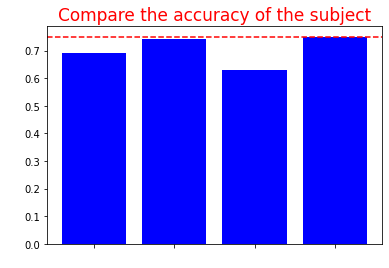

In [ ]:
GG()

### ตัวเเบบที่เหมาะสมที่สุดกับชุดข้อมูลนี้ คือ ตัวแบบของ LogisticRegression โดยมีค่ามากที่สุดในทั้ง 4 ตัวแบบ คือ 0.756